## Caso Email Spam

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [101]:
nombres=pd.read_csv('spambase.names', header=None, sep=':')

In [102]:
nombres.head()

,0,1
0,word_freq_make,continuous.
1,word_freq_address,continuous.
2,word_freq_all,continuous.
3,word_freq_3d,continuous.
4,word_freq_our,continuous.


In [83]:
#nombres=nombres.to_numpy().tolist()

In [103]:
nombres[0].squeeze()

0                 word_freq_make
1              word_freq_address
2                  word_freq_all
3                   word_freq_3d
4                  word_freq_our
5                 word_freq_over
6               word_freq_remove
7             word_freq_internet
8                word_freq_order
9                 word_freq_mail
10             word_freq_receive
11                word_freq_will
12              word_freq_people
13              word_freq_report
14           word_freq_addresses
15                word_freq_free
16            word_freq_business
17               word_freq_email
18                 word_freq_you
19              word_freq_credit
20                word_freq_your
21                word_freq_font
22                 word_freq_000
23               word_freq_money
24                  word_freq_hp
25                 word_freq_hpl
26              word_freq_george
27                 word_freq_650
28                 word_freq_lab
29                word_freq_labs
30        

In [104]:
df=pd.read_csv('spambase.data', header=None)

In [105]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [106]:
df.columns=nombres[0]

In [107]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


### Analisis exploratorio

In [108]:
df.isnull().sum()

0
word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_f

In [109]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [110]:
df.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


<Axes: xlabel='spam', ylabel='count'>

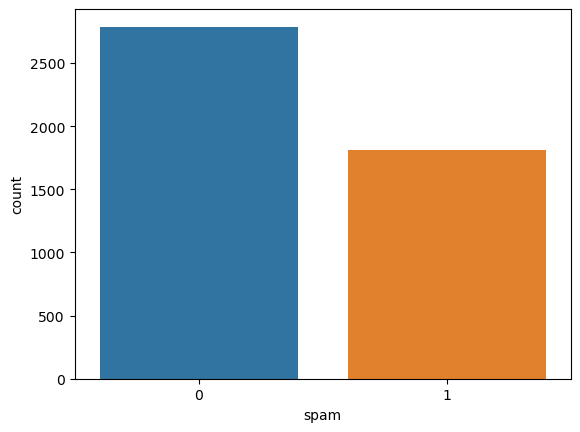

In [112]:
sns.countplot(data=df, x='spam', label = "Count")

### Formulación del modelo

In [113]:
X = df[['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total']]
y = df['spam']

In [114]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [115]:
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

In [116]:
encoder.classes_

array([0, 1], dtype=int64)

### Cross Validation

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

### Modelo Logístico

In [119]:
from sklearn.linear_model import LogisticRegression

In [120]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

C:\Users\Sebastian\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Evaluación del Modelo

In [121]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [122]:
y_pred = clf.predict(X_test)

In [123]:
accuracy_score(y_test,y_pred)

0.939174511223751

In [124]:
confusion_matrix(y_test,y_pred)

array([[779,  41],
       [ 43, 518]], dtype=int64)

## Balanceo de datos

In [125]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [126]:
Counter(y)

Counter({1: 1813, 0: 2788})

In [127]:
#transformar el dataset

oversample=SMOTE()
X,y=oversample.fit_resample(X,y)

In [128]:
Counter(y)

Counter({1: 2788, 0: 2788})

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

In [130]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

C:\Users\Sebastian\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [131]:
accuracy_score(y_test,y_pred)

0.9366407650926479

In [132]:
confusion_matrix(y_test,y_pred)

array([[771,  54],
       [ 52, 796]], dtype=int64)

El balanceo hizo que el accurracy fuera menor, y es porque las coincidencias para spam=0 disminuyeron y aumentaron los errores. En cambio para spam=1 ocurrio lo contrario. El resultado fue un accuracy menor.

### Tuning de Hiperparámetros

#### Usando arboles como modelo

In [139]:
from sklearn.ensemble import RandomForestClassifier

In [140]:
rfc = RandomForestClassifier(n_estimators=150)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [141]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [142]:
y_pred = rfc.predict(X_test)

In [143]:
accuracy_score(y_test,y_pred)

0.9647340107591154

In [144]:
confusion_matrix(y_test,y_pred)

array([[803,  22],
       [ 37, 811]], dtype=int64)

In [145]:
from sklearn.model_selection import GridSearchCV

In [146]:
grid={
    'max_features': [1,2,3],
    'max_depth':range(2,15)
}

In [147]:
rfc= RandomForestClassifier(n_estimators=100)

In [148]:
search=GridSearchCV(estimator=rfc,scoring='recall',param_grid=grid,cv=3,verbose=3)

In [149]:
search.fit(X_train,y_train)

Fitting 3 folds for each of 39 candidates, totalling 117 fits
[CV 1/3] END .......max_depth=2, max_features=1;, score=0.814 total time=   0.2s
[CV 2/3] END .......max_depth=2, max_features=1;, score=0.799 total time=   0.2s
[CV 3/3] END .......max_depth=2, max_features=1;, score=0.815 total time=   0.2s
[CV 1/3] END .......max_depth=2, max_features=2;, score=0.861 total time=   0.2s
[CV 2/3] END .......max_depth=2, max_features=2;, score=0.838 total time=   0.2s
[CV 3/3] END .......max_depth=2, max_features=2;, score=0.807 total time=   0.2s
[CV 1/3] END .......max_depth=2, max_features=3;, score=0.873 total time=   0.2s
[CV 2/3] END .......max_depth=2, max_features=3;, score=0.805 total time=   0.2s
[CV 3/3] END .......max_depth=2, max_features=3;, score=0.852 total time=   0.2s
[CV 1/3] END .......max_depth=3, max_features=1;, score=0.858 total time=   0.3s
[CV 2/3] END .......max_depth=3, max_features=1;, score=0.767 total time=   0.2s
[CV 3/3] END .......max_depth=3, max_features=1

[CV 3/3] END ......max_depth=13, max_features=1;, score=0.909 total time=   0.3s
[CV 1/3] END ......max_depth=13, max_features=2;, score=0.935 total time=   0.3s
[CV 2/3] END ......max_depth=13, max_features=2;, score=0.924 total time=   0.3s
[CV 3/3] END ......max_depth=13, max_features=2;, score=0.932 total time=   0.3s
[CV 1/3] END ......max_depth=13, max_features=3;, score=0.946 total time=   0.4s
[CV 2/3] END ......max_depth=13, max_features=3;, score=0.924 total time=   0.4s
[CV 3/3] END ......max_depth=13, max_features=3;, score=0.926 total time=   0.4s
[CV 1/3] END ......max_depth=14, max_features=1;, score=0.926 total time=   0.2s
[CV 2/3] END ......max_depth=14, max_features=1;, score=0.906 total time=   0.3s
[CV 3/3] END ......max_depth=14, max_features=1;, score=0.913 total time=   0.3s
[CV 1/3] END ......max_depth=14, max_features=2;, score=0.937 total time=   0.3s
[CV 2/3] END ......max_depth=14, max_features=2;, score=0.926 total time=   0.3s
[CV 3/3] END ......max_depth

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 15), 'max_features': [1, 2, 3]},
             scoring='recall', verbose=3)

In [150]:
search.best_params_

{'max_depth': 14, 'max_features': 3}

In [151]:
search.best_score_

0.9381514746954668

In [152]:
y_pred=search.best_estimator_.predict(X_test)

In [153]:
confusion_matrix(y_test,y_pred)

array([[804,  21],
       [ 41, 807]], dtype=int64)

De nuevo, el metodo de técnicas de optimización de hiperparámetros dio como resultado un menor desempeño que no haberlo hecho.

### Sobreajuste y regularización


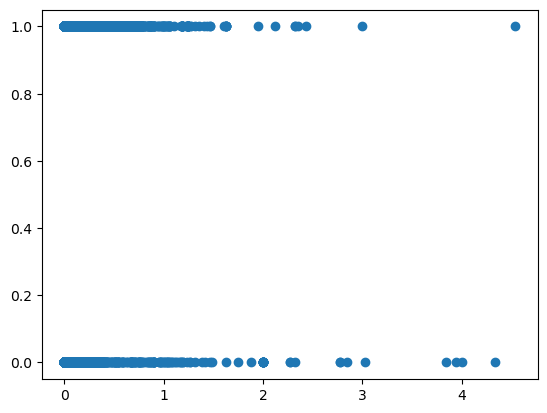

In [166]:
plt.scatter(X['word_freq_make'],y)

In [176]:
from sklearn.linear_model import LinearRegression

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

In [178]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [187]:
lr.coef_

array([-5.86543300e-02, -1.77688716e-02,  3.20692677e-02,  1.08655014e-02,
        8.69937002e-02,  1.16806065e-01,  1.98024345e-01,  9.48415680e-02,
        7.03766028e-02,  1.99145770e-02,  4.59456294e-02, -3.73847308e-02,
        7.84780717e-03,  7.08375396e-03,  2.91696578e-03,  7.51830862e-02,
        3.04021262e-02,  5.41497775e-02,  1.50531526e-02,  5.16092128e-02,
        5.63486752e-02,  4.20606668e-02,  1.58787632e-01,  8.62378995e-02,
       -2.96995192e-02, -2.96879230e-02, -1.67524999e-02,  2.76279974e-03,
       -1.01348215e-02, -5.64288452e-02, -2.81998775e-02,  9.88067574e-02,
       -5.52584349e-02, -2.74804934e-02, -3.90919893e-02,  3.60863827e-02,
       -4.52960509e-02, -5.77290999e-02, -2.80899468e-02,  3.65004383e-02,
       -1.36455854e-02, -4.60128123e-02, -8.07923904e-02, -4.28233898e-02,
       -4.45812032e-02, -4.98249580e-02, -2.39241179e-01, -7.70067586e-02,
       -1.54517155e-01, -6.25203120e-02, -8.10133175e-02,  7.39410963e-02,
        2.12576774e-01,  

### Ajuste modelo lineal con Regularización L1

In [188]:
from sklearn.linear_model import Lasso

In [189]:
lr1 = Lasso(max_iter=100000, alpha=0.001)
lr1.fit(X,y)

Lasso(alpha=0.001, max_iter=100000)

In [190]:
y_pred = lr1.predict(X_test)

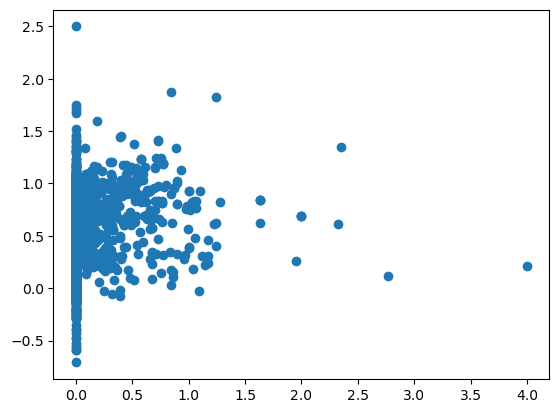

In [196]:
plt.scatter(X_test['word_freq_make'],y_pred)
